In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, pearsonr

# Load each dataset
import pandas as pd
import os

# Define file paths
#file_path = r"C:\Users\samia\OneDrive\Documents\GitHub\springboard\Project Proposal\bank-additional\bank-additional-full.csv"
#file_path1 = r"C:\Users\samia\OneDrive\Documents\GitHub\springboard\Project Proposal\bank-marketing\bank-additional\bank-additional.csv"
file_path = r"C:\Users\samia\OneDrive\Documents\GitHub\springboard\Project Proposal\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv"
file_path1=r"C:\Users\samia\OneDrive\Documents\GitHub\springboard\Project Proposal\bank+marketing\bank-additional\bank-additional\bank-additional.csv"
# Check if files exist
print("Does the full dataset file exist?", os.path.exists(file_path))
print("Does the additional dataset file exist?", os.path.exists(file_path1))

# Load datasets if they exist
if os.path.exists(file_path):
    bank_additional_full = pd.read_csv(file_path)
else:
    print(f"File not found: {file_path}")

if os.path.exists(file_path1):
    bank_full = pd.read_csv(file_path1)
else:
    print(f"File not found: {file_path1}")

# Check the data from the first dataset
if 'bank_additional_full' in locals():
    print(bank_additional_full.head())


# Load datasets (assuming they exist)
data_full = pd.read_csv(file_path, sep=';')

target_var = 'y'  # Ensure correct target variable usage
numerical_cols = data_full.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_full.select_dtypes(include=['object']).columns

Does the full dataset file exist? True
Does the additional dataset file exist? True
  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married"

In [6]:
# Inspect the data
print(data_full.head())
print(data_full.info())
print(data_full.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [7]:
# Check for missing values
missing_values = data_full.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


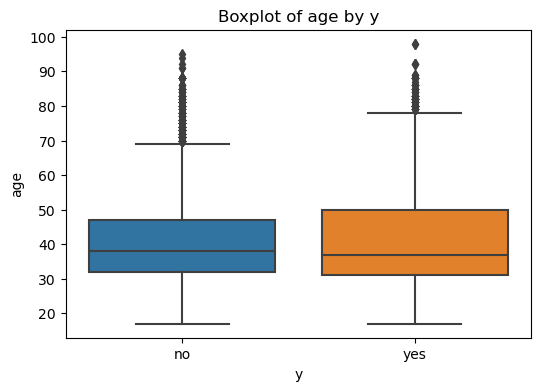

T-test for age: t-stat = 6.1721, p-value = 0.0000


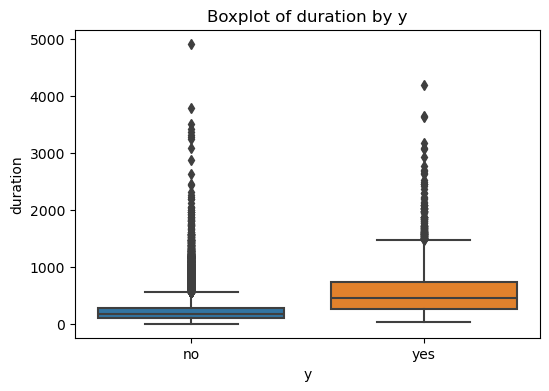

T-test for duration: t-stat = 89.9672, p-value = 0.0000


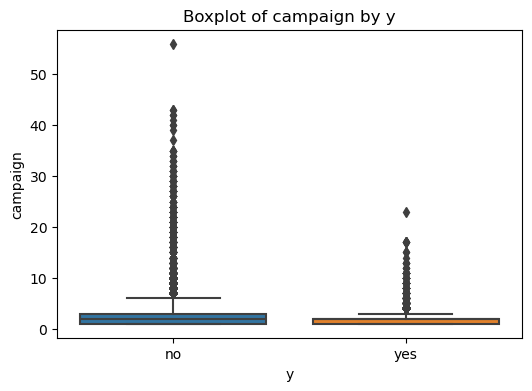

T-test for campaign: t-stat = -13.4965, p-value = 0.0000


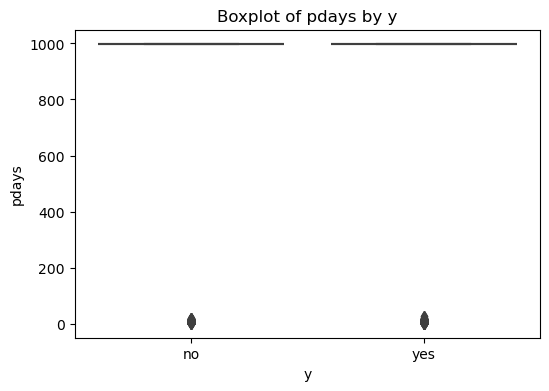

T-test for pdays: t-stat = -69.7221, p-value = 0.0000


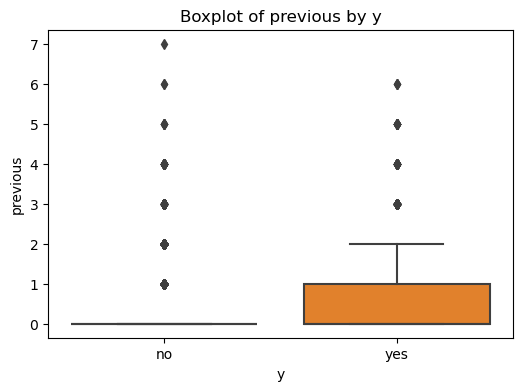

T-test for previous: t-stat = 48.0027, p-value = 0.0000


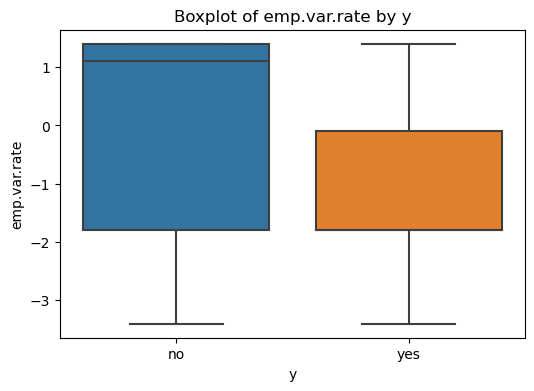

T-test for emp.var.rate: t-stat = -63.4337, p-value = 0.0000


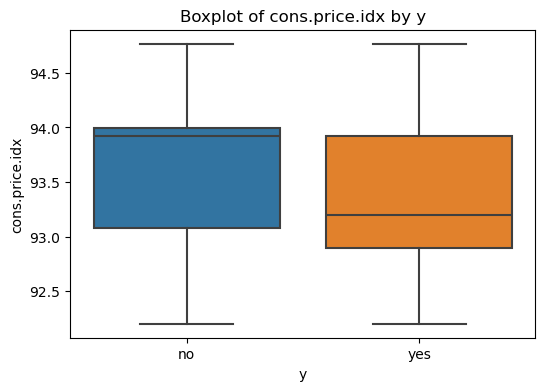

T-test for cons.price.idx: t-stat = -27.9032, p-value = 0.0000


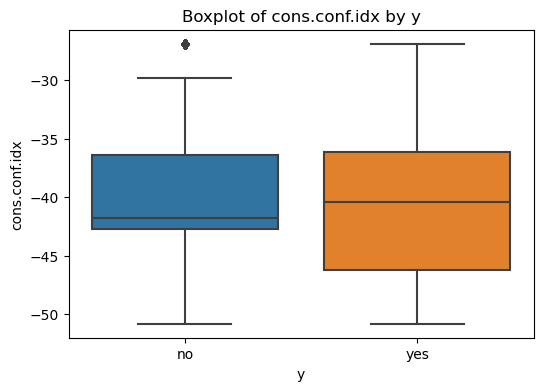

T-test for cons.conf.idx: t-stat = 11.1539, p-value = 0.0000


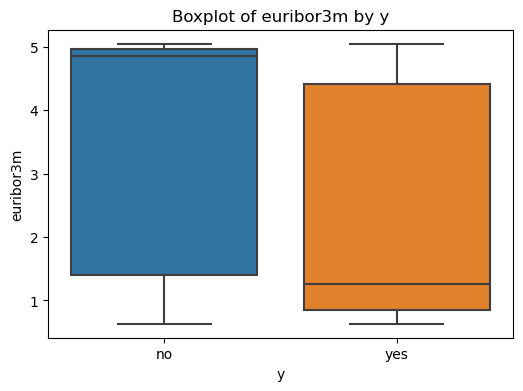

T-test for euribor3m: t-stat = -65.6466, p-value = 0.0000


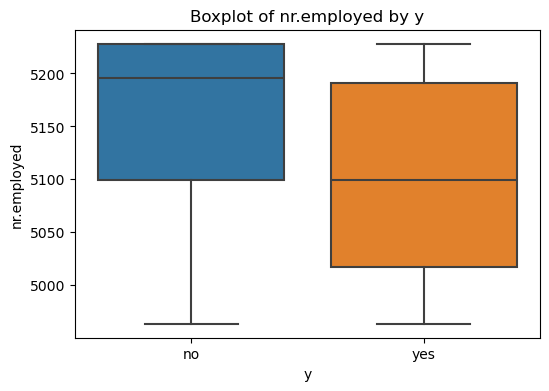

T-test for nr.employed: t-stat = -76.9845, p-value = 0.0000


In [2]:
# --- Bivariate Analysis ---
# Numerical vs. Target: Boxplots & T-Tests
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data_full[target_var], y=data_full[col])
    plt.title(f"Boxplot of {col} by {target_var}")
    plt.show()
    
    # Perform T-Test
    yes_group = data_full[data_full[target_var] == 'yes'][col]
    no_group = data_full[data_full[target_var] == 'no'][col]
    t_stat, p_value = ttest_ind(yes_group, no_group, nan_policy='omit')
    print(f"T-test for {col}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

In [8]:
# --- Step 1: Inferential Statistics ---
# Example: T-test for numerical variables against the target variable
target_var = 'y'  # Assuming 'y' is the response variable
numerical_cols = data_full.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    yes_group = data_full[data_full[target_var] == 'yes'][col]
    no_group = data_full[data_full[target_var] == 'no'][col]
    t_stat, p_value = ttest_ind(yes_group, no_group, nan_policy='omit')
    print(f"T-test for {col}: t-stat = {t_stat}, p-value = {p_value}")

T-test for age: t-stat = 6.172087109640128, p-value = 6.80213641846347e-10
T-test for duration: t-stat = 89.9672253349018, p-value = 0.0
T-test for campaign: t-stat = -13.496542997299592, p-value = 2.0077799906175704e-41
T-test for pdays: t-stat = -69.72211465560429, p-value = 0.0
T-test for previous: t-stat = 48.00267792469279, p-value = 0.0
T-test for emp.var.rate: t-stat = -63.43366555294073, p-value = 0.0
T-test for cons.price.idx: t-stat = -27.90322177969163, p-value = 9.318964779131688e-170
T-test for cons.conf.idx: t-stat = 11.153921944215297, p-value = 7.536664996589872e-29
T-test for euribor3m: t-stat = -65.64662251866284, p-value = 0.0
T-test for nr.employed: t-stat = -76.98448315100892, p-value = 0.0


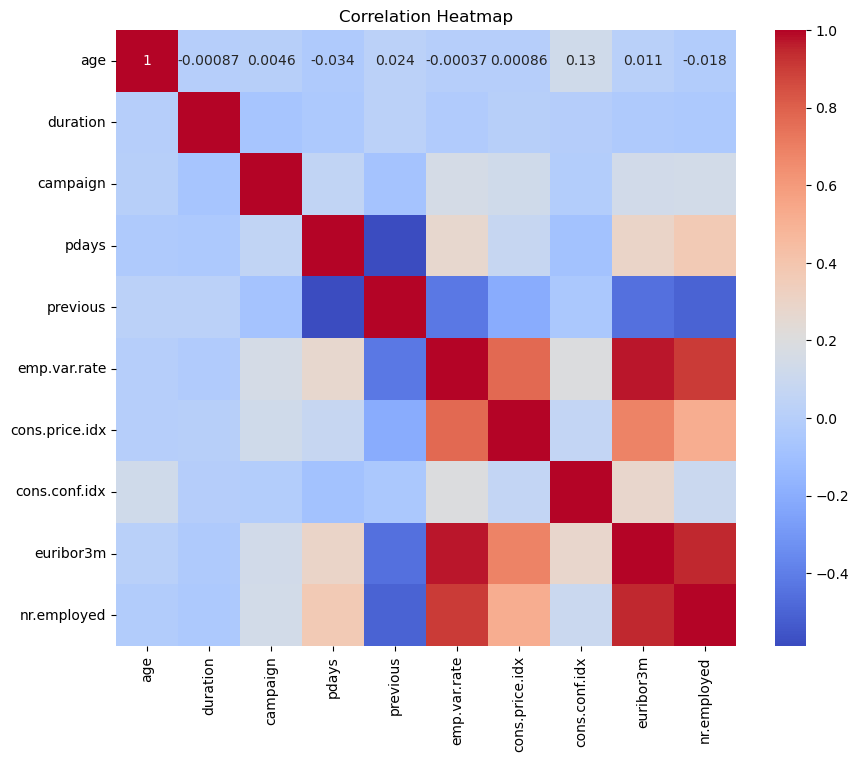

In [9]:
# --- Step 2: Explore Data Relationships ---
# Bi-Variate Heatmap for correlations
corr_matrix = data_full[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

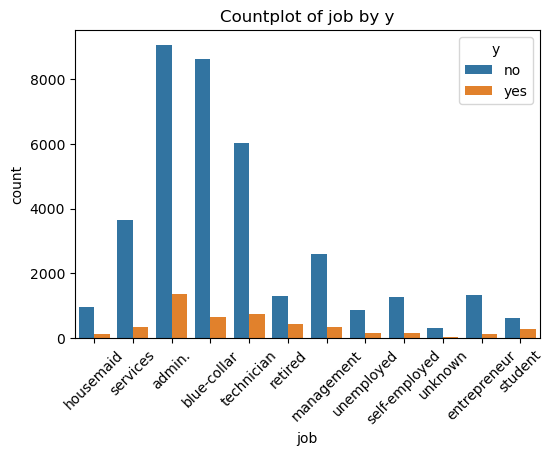

Chi-Square test for job: chi2-stat = 961.2424, p-value = 0.0000


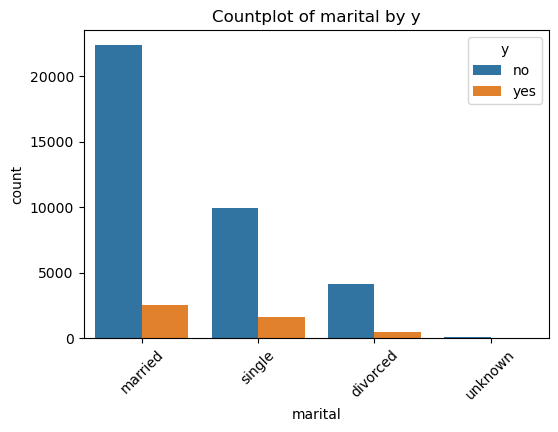

Chi-Square test for marital: chi2-stat = 122.6552, p-value = 0.0000


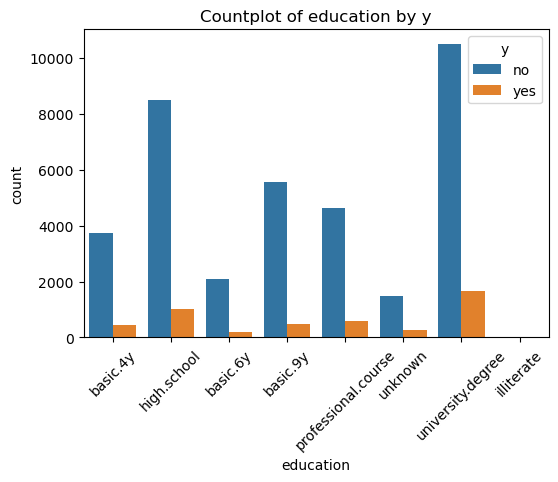

Chi-Square test for education: chi2-stat = 193.1059, p-value = 0.0000


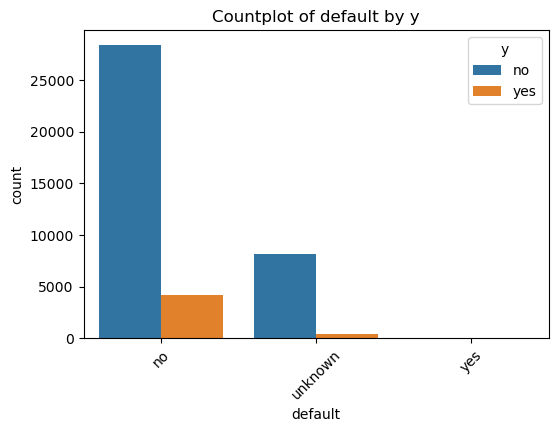

Chi-Square test for default: chi2-stat = 406.5775, p-value = 0.0000


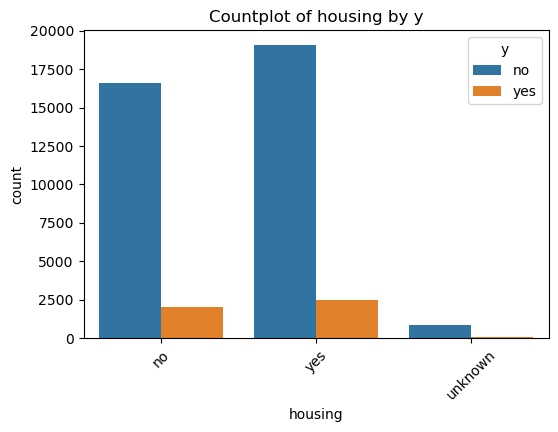

Chi-Square test for housing: chi2-stat = 5.6845, p-value = 0.0583


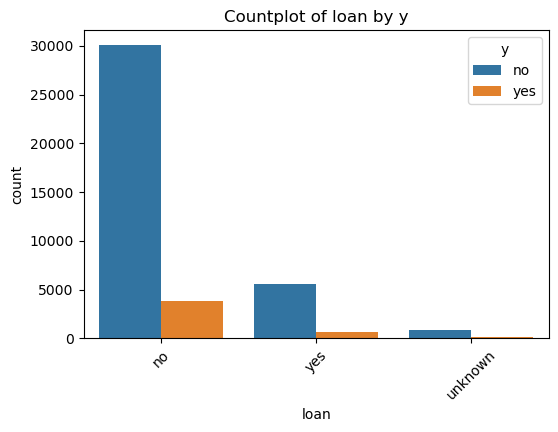

Chi-Square test for loan: chi2-stat = 1.0940, p-value = 0.5787


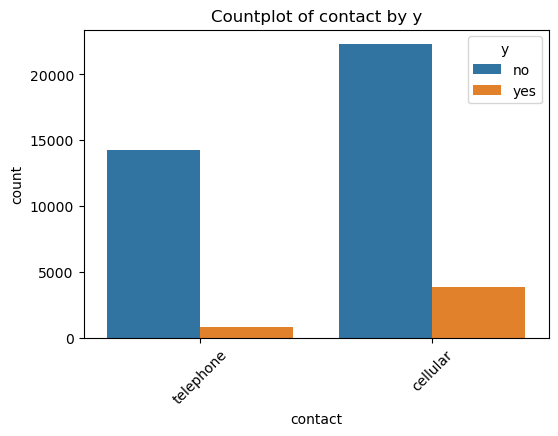

Chi-Square test for contact: chi2-stat = 862.3184, p-value = 0.0000


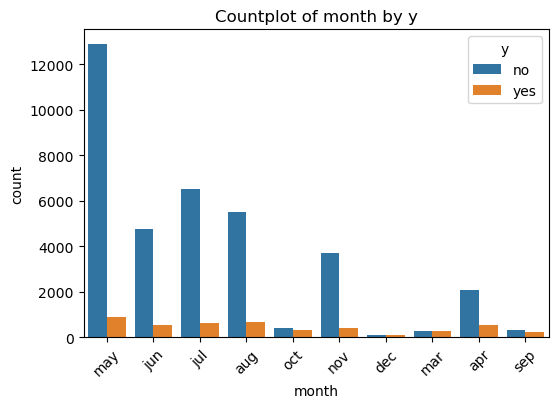

Chi-Square test for month: chi2-stat = 3101.1494, p-value = 0.0000


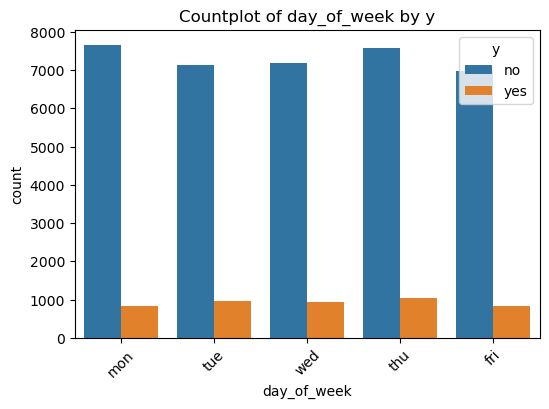

Chi-Square test for day_of_week: chi2-stat = 26.1449, p-value = 0.0000


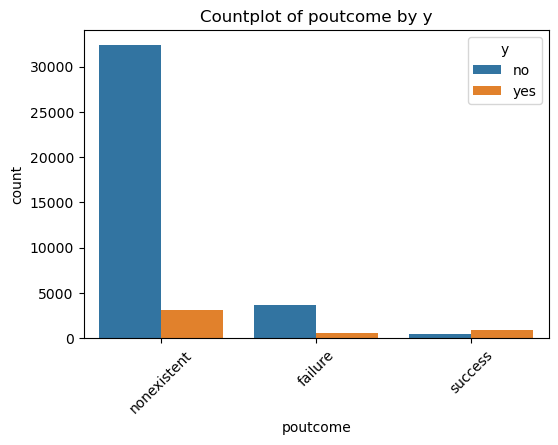

Chi-Square test for poutcome: chi2-stat = 4230.5238, p-value = 0.0000


In [3]:
# Categorical vs. Target: Chi-Square Test & Bar Plots
for col in categorical_cols:
    if col != target_var:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue=target_var, data=data_full)
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col} by {target_var}")
        plt.show()
        
        # Perform Chi-Square Test
        contingency_table = pd.crosstab(data_full[col], data_full[target_var])
        chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square test for {col}: chi2-stat = {chi2_stat:.4f}, p-value = {p:.4f}")

In [10]:
# Example setup (replace with your actual DataFrame and variables)
# data_full = pd.read_csv("path_to_your_data.csv")  # Load your dataset
# Replace `categorical_cols` and `target_var` with actual column names
categorical_cols = ['age', 'duration', 'pdays']  # List of columns to analyze
target_var = 'target_column'  # Your target variable (categorical)

# Validate columns
valid_cols = [col for col in categorical_cols if col in data_full.columns]
invalid_cols = [col for col in categorical_cols if col not in data_full.columns]
if invalid_cols:
    print(f"Invalid columns (not in DataFrame): {invalid_cols}")

# Loop through valid columns
for col in valid_cols:
    if col != target_var:
        if pd.api.types.is_numeric_dtype(data_full[col]):
            try:
                sns.boxplot(data=data_full, x=target_var, y=data_full[col])
                plt.title(f"Boxplot of {col} vs {target_var}")
                plt.show()
            except Exception as e:
                print(f"Error plotting boxplot for column '{col}': {e}")
        else:
            print(f"Skipping non-numeric column: {col}")


Error plotting boxplot for column 'age': Could not interpret input 'target_column'
Error plotting boxplot for column 'duration': Could not interpret input 'target_column'
Error plotting boxplot for column 'pdays': Could not interpret input 'target_column'


In [13]:
print(data_full.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


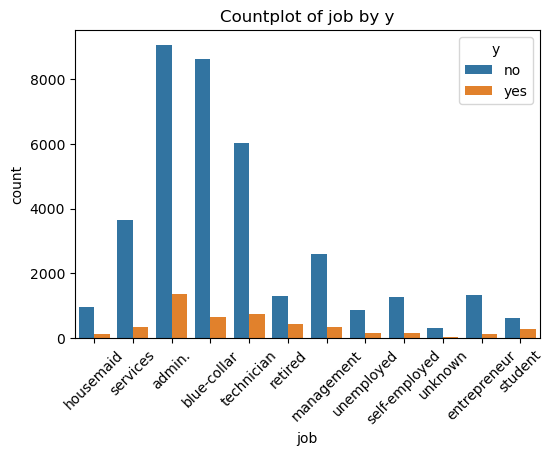

Chi-Square test for job: chi2-stat = 961.2424, p-value = 0.0000


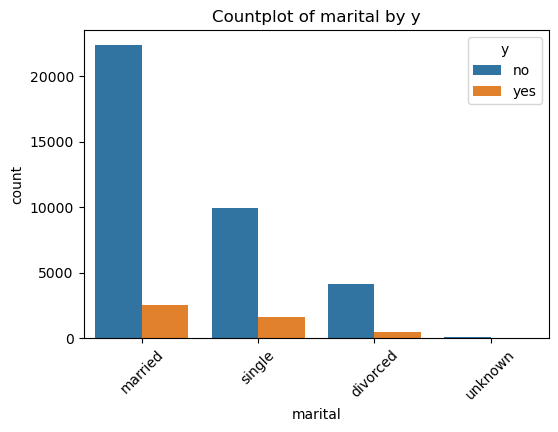

Chi-Square test for marital: chi2-stat = 122.6552, p-value = 0.0000


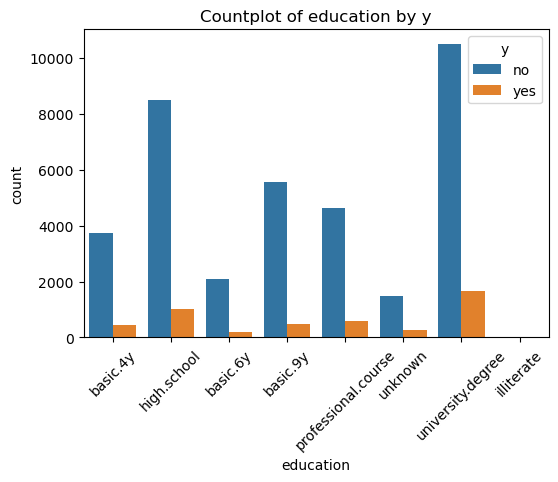

Chi-Square test for education: chi2-stat = 193.1059, p-value = 0.0000


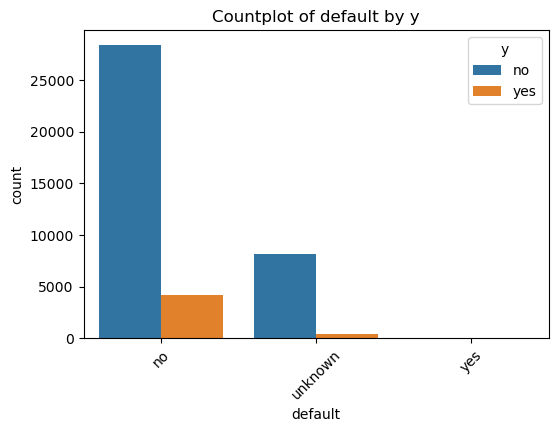

Chi-Square test for default: chi2-stat = 406.5775, p-value = 0.0000


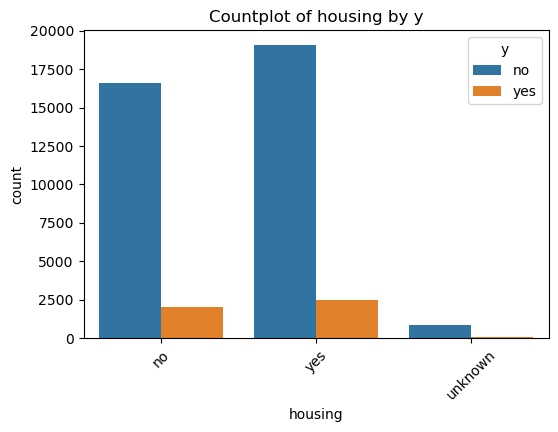

Chi-Square test for housing: chi2-stat = 5.6845, p-value = 0.0583


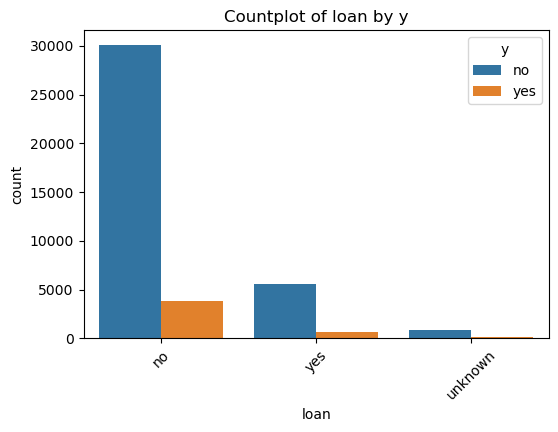

Chi-Square test for loan: chi2-stat = 1.0940, p-value = 0.5787


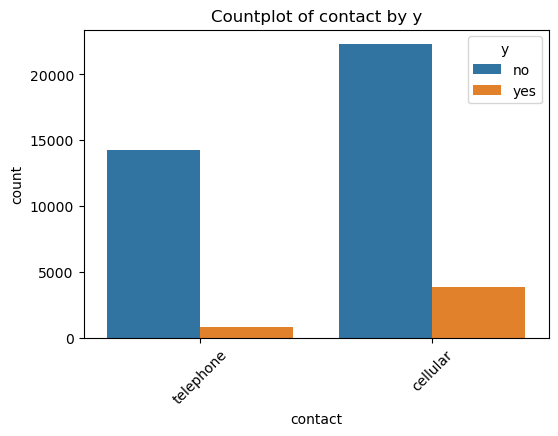

Chi-Square test for contact: chi2-stat = 862.3184, p-value = 0.0000


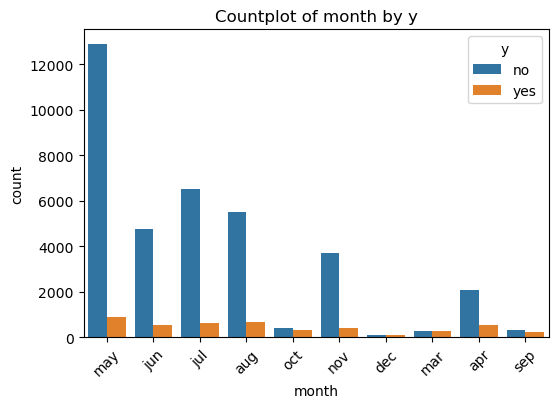

Chi-Square test for month: chi2-stat = 3101.1494, p-value = 0.0000


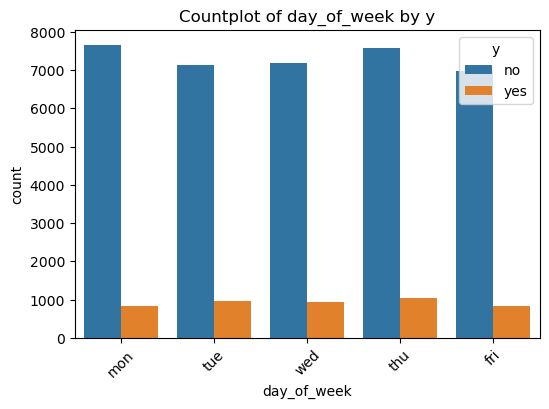

Chi-Square test for day_of_week: chi2-stat = 26.1449, p-value = 0.0000


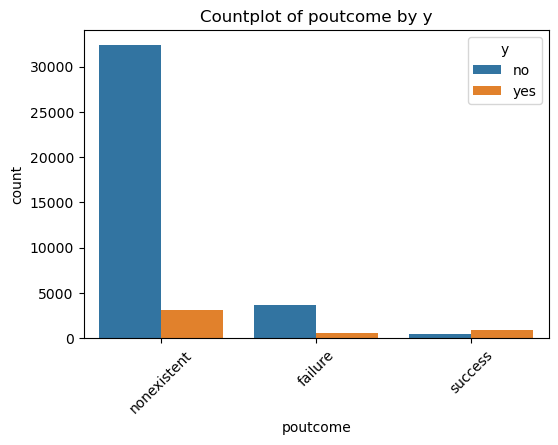

Chi-Square test for poutcome: chi2-stat = 4230.5238, p-value = 0.0000


In [4]:
# Categorical vs. Target: Chi-Square Test & Bar Plots
for col in categorical_cols:
    if col != target_var:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue=target_var, data=data_full)
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col} by {target_var}")
        plt.show()
        
        # Perform Chi-Square Test
        contingency_table = pd.crosstab(data_full[col], data_full[target_var])
        chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square test for {col}: chi2-stat = {chi2_stat:.4f}, p-value = {p:.4f}")

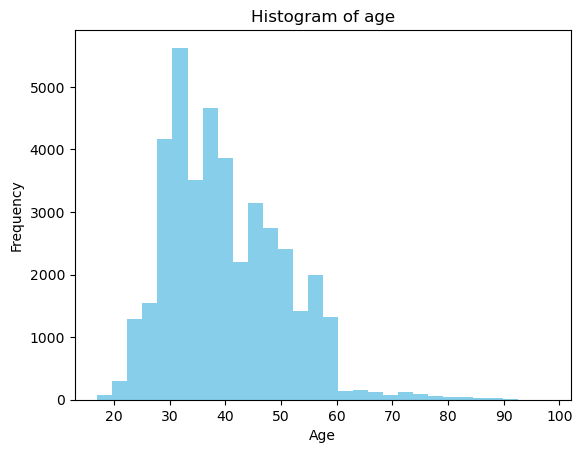

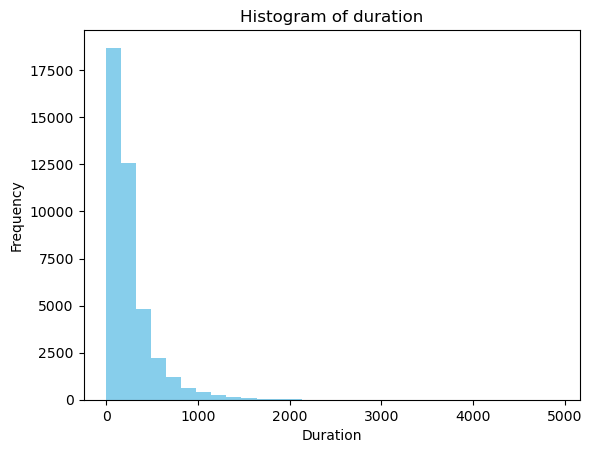

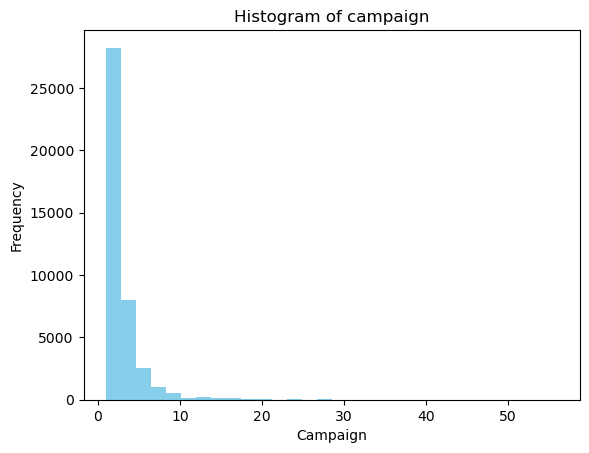

In [19]:
# UNIVARIATE Histogram of a numerical column
# List of numerical columns to plot
numerical_columns = ['age', 'duration', 'campaign']

# Plot histogram for each column
for col in numerical_columns:
    data_full[col].plot(kind='hist', bins=30, title=f'Histogram of {col}', color='skyblue')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()



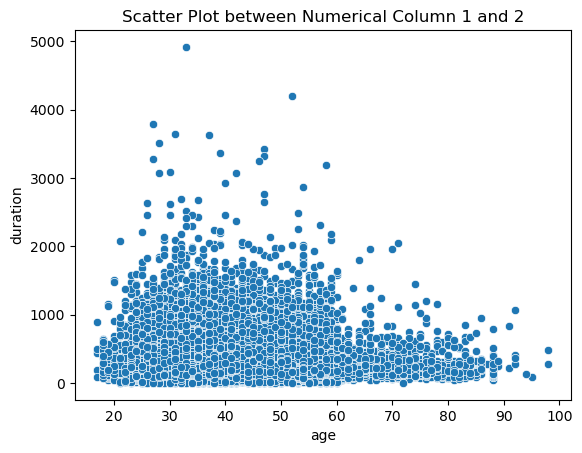

In [25]:
# BI-Variate Scatter plot
sns.scatterplot(x='age', y='duration', data=data_full)
plt.title('Scatter Plot between Numerical Column 1 and 2')
plt.show()

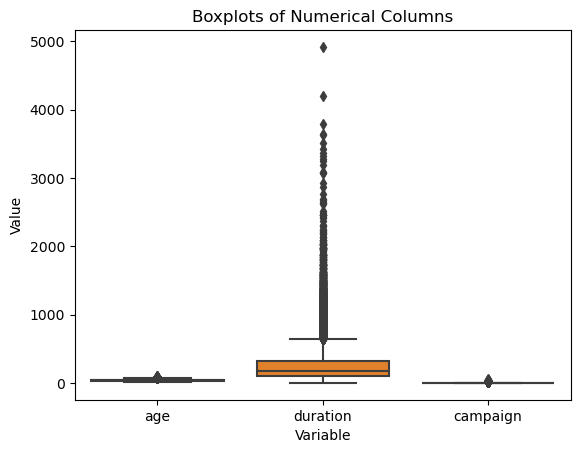

In [23]:
# Univariate Boxplot
##Selecting only the columns to plot
columns_to_plot = ['age', 'duration', 'campaign']

# Melt the DataFrame to a long format
data_melted = data_full[columns_to_plot].melt(var_name='Variable', value_name='Value')

# Plotting the boxplot
sns.boxplot(x='Variable', y='Value', data=data_melted)
plt.title('Boxplots of Numerical Columns')
plt.show()

In [26]:
# --- Step 3: Feature Selection and Engineering ---
# Encode categorical variables
data_encoded = pd.get_dummies(data_full, drop_first=True)

# Handle missing values (example: fill with mean for numerical columns)
data_encoded.fillna(data_encoded.mean(), inplace=True)

In [27]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Optional: Log-transform skewed variables
for col in numerical_cols:
    if data_encoded[col].skew() > 1 or data_encoded[col].skew() < -1:
        data_encoded[col] = np.log1p(data_encoded[col])

C:\Users\samia\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
# Feature selection example: Correlation threshold
threshold = 0.8
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print("Highly correlated features:", high_corr_features)

Highly correlated features: ['euribor3m', 'nr.employed']


In [29]:
# Drop highly correlated features
data_reduced = data_encoded.drop(high_corr_features, axis=1)

In [30]:
# Save cleaned and processed data
processed_file_path = r"C:\Users\samia\OneDrive\Documents\GitHub\springboard\Project Proposal\processed_data.csv"
data_reduced.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")

Processed data saved to C:\Users\samia\OneDrive\Documents\GitHub\springboard\Project Proposal\processed_data.csv


In [5]:
# Insights
print("\nKey Insights:")
print("1. Features like 'duration' show a strong distinction between positive and negative response groups.")
print("2. Some categorical variables (e.g., job type, marital status) seem to influence the response variable.")
print("3. Highly correlated numerical features may introduce redundancy in predictive modeling.")



Key Insights:
1. Features like 'duration' show a strong distinction between positive and negative response groups.
2. Some categorical variables (e.g., job type, marital status) seem to influence the response variable.
3. Highly correlated numerical features may introduce redundancy in predictive modeling.
